# Web Scraping with [Python](https://www.python.org/) using [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [`requests`](https://2.python-requests.org/en/master/)

The task is to scarpe user reviews of a Beiersdorf product and analyze its content by generating a wordcloud.

__Set up__

In [24]:
%load_ext autoreload
%autoreload 2

__Importieren von Python Bibliotheken__

In [25]:
from bs4 import BeautifulSoup
import requests
import sys

**Add path to look for modules**

In [26]:
import sys
sys.path.append("../src")

In [27]:
import helper_functions as hf

## Understanding the website

Please check first the [https://www.beautyheaven.com.au/robots.txt](https://www.beautyheaven.com.au/robots.txt) site.

In [105]:
url = 'https://www.beautyheaven.com.au/mum-baby/baby-skin/710-nivea-creme-nivea-creme'

Visit the website above an try to figure out where the data of interest, the review texts, is made available.

## Fetching the content of the website using `requests` and  `BeautifulSoup`

In [106]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64;     x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate",     "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

In [107]:
#soup

### Find the revelant item where the data is made available

In [122]:
soup.find('div', {"class": 'field-item even'})

<div class="field-item even"><a class="colorbox" href="//cf.beautyheaven-site-au.prod.bhn.net.au/sites/default/files/products/Nivea-Cre%CC%80me-Tin.jpg" rel="gallery-node-606717-y2R1U6YOzEo" title="NIVEA - "><img alt="" height="250" src="//cf.beautyheaven-site-au.prod.bhn.net.au/sites/default/files/styles/product_thumbnail/public/products/Nivea-Cre%CC%80me-Tin.jpg?itok=4Z77adeM" title="" width="250"/></a></div>

In [123]:
items = soup.find_all('div', {"class": 'field-item even'})
len(items)

98

### Extract the text information

In [110]:
item = soup.find_all('div', {"class": 'field-item even'})[5]
item

<div class="field-item even"><p>Nivea Creme is a great product I use it if I have very dry skin areas that I need to rub some on you only need a small amount it goes a long way. </p>
<p>Also use Nivea Creme as a Eye makeup remover for Waterproof eye makeup and does a great job without stinging your eyes. Afterwards I use a Cleansing Facial Wipe to wipe away any residue. </p>
<p>I find Nivea Creme very versatile.</p>
</div>

In [111]:
item.find_all('p')

[<p>Nivea Creme is a great product I use it if I have very dry skin areas that I need to rub some on you only need a small amount it goes a long way. </p>,
 <p>Also use Nivea Creme as a Eye makeup remover for Waterproof eye makeup and does a great job without stinging your eyes. Afterwards I use a Cleansing Facial Wipe to wipe away any residue. </p>,
 <p>I find Nivea Creme very versatile.</p>]

In [112]:
[x.get_text() for x in item.find_all('p')]

['Nivea Creme is a great product I use it if I have very dry skin areas that I need to rub some on you only need a small amount it goes a long way. ',
 'Also use Nivea Creme as a Eye makeup remover for Waterproof eye makeup and does a great job without stinging your eyes. Afterwards I use a Cleansing Facial Wipe to wipe away any residue. ',
 'I find Nivea Creme very versatile.']

In [113]:
item.get_text()

'Nivea Creme is a great product I use it if I have very dry skin areas that I need to rub some on you only need a small amount it goes a long way. \nAlso use Nivea Creme as a Eye makeup remover for Waterproof eye makeup and does a great job without stinging your eyes. Afterwards I use a Cleansing Facial Wipe to wipe away any residue. \nI find Nivea Creme very versatile.\n'

### Refactor the logic into a function
* Loop over all findings
* Pick only items with a paragraph tag `<p>`
* Extract text 

In [115]:
??hf.extract_text_from_soup

Signature: hf.extract_text_from_soup(soup)
Source:   
def extract_text_from_soup(soup):
    '''
    Function to extract user review text information from the site https://www.beautyheaven.com.au/
    '''
    # fetch the items of interest
    items = soup.find_all('div', {"class": 'field-item even'})
    review_text = ''
    # iterate over the itmes and extract text information
    for i in range(len(items)):
        content = items[i].find_all('p')
        if i > 2: # exclude first entries as they are not user reviews
            if len(content) >= 1: # do not include empty strings
                text = ' '.join([x.get_text().strip() for x in content])
                review_text = review_text + ' ' + text
    return review_text
File:      ~/Documents/hello-world-academy/Beiersdorf_2019/beiersdorf-2019/05_webscraping_with_python/src/helper_functions.py
Type:      function


In [116]:
review_text = hf.extract_text_from_soup(soup)

In [117]:
print(f'There are {len(review_text.split())} words extracted.')

There are 1918 words extracted.


In [118]:
review_text

" Nivea Creme is a great product I use it if I have very dry skin areas that I need to rub some on you only need a small amount it goes a long way. Also use Nivea Creme as a Eye makeup remover for Waterproof eye makeup and does a great job without stinging your eyes. Afterwards I use a Cleansing Facial Wipe to wipe away any residue. I find Nivea Creme very versatile. This product reminds me of my Gran, as its something that she has used for years.\nI'm a big fan of the classic-tin packaging, which makes it stand out from other products on  the market. Although I have very dry skin I found that this formula was just too thick for my skin when used as a moisturiser: only a very small amount was required and it took a long time to absorb into my skin, leaving a white sheen over my face. This meant that if using as part of my morning routine it wasn't compatible with make-up. I could see this as a great staple that can be used for face (probably more suited as a night cream or for those wi

## Generating a word cloud

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

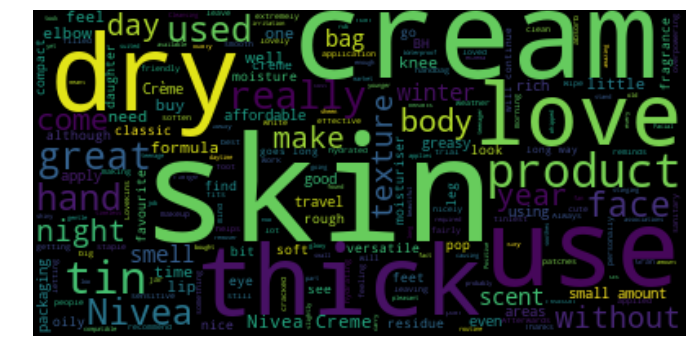

In [120]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(review_text)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

***